# Suomi24 Corpus: Yearly Evolution of Hate and Friendly Speech

This notebook loads message data from PostgreSQL, aggregates yearly counts for hate speech (Query 1), friendly speech (Query 2), and both, and visualizes the results.

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import os

In [8]:
# Connect to PostgreSQL and load data into pandas DataFrame
conn = psycopg2.connect(
    dbname=os.environ.get("POSTGRES_DB", "suomi24"),
    user=os.environ.get("POSTGRES_USER", "postgres"),
    password=os.environ.get("POSTGRES_PASSWORD", "secret"),
    host="localhost",
    port=os.environ.get("POSTGRES_PORT", 5432)
)

query = """
SELECT date, query_type FROM messages
WHERE date IS NOT NULL
"""
df = pd.read_sql(query, conn)
conn.close()

df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

C:\Users\saari\AppData\Local\Temp\ipykernel_26260\598518.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,query_type,year
0,2001-01-03,friendlyfound_friendly,2001
1,2001-01-01,friendlyfound_friendly,2001
2,2001-01-01,friendlyfound_friendly,2001
3,2001-01-02,friendlyfound_friendly,2001
4,2001-01-05,friendlyfound_friendly,2001


In [9]:
# Aggregate yearly counts for each query type
agg = df.groupby(['year', 'query_type']).size().unstack(fill_value=0)
agg['both'] = agg.get('both', 0)
agg['hate'] = agg.get('hate', 0)
agg['friendly'] = agg.get('friendly', 0)
agg = agg[['hate', 'friendly', 'both']]
agg.head()

query_type,hate,friendly,both
year,,,
2001,13677,0,2725


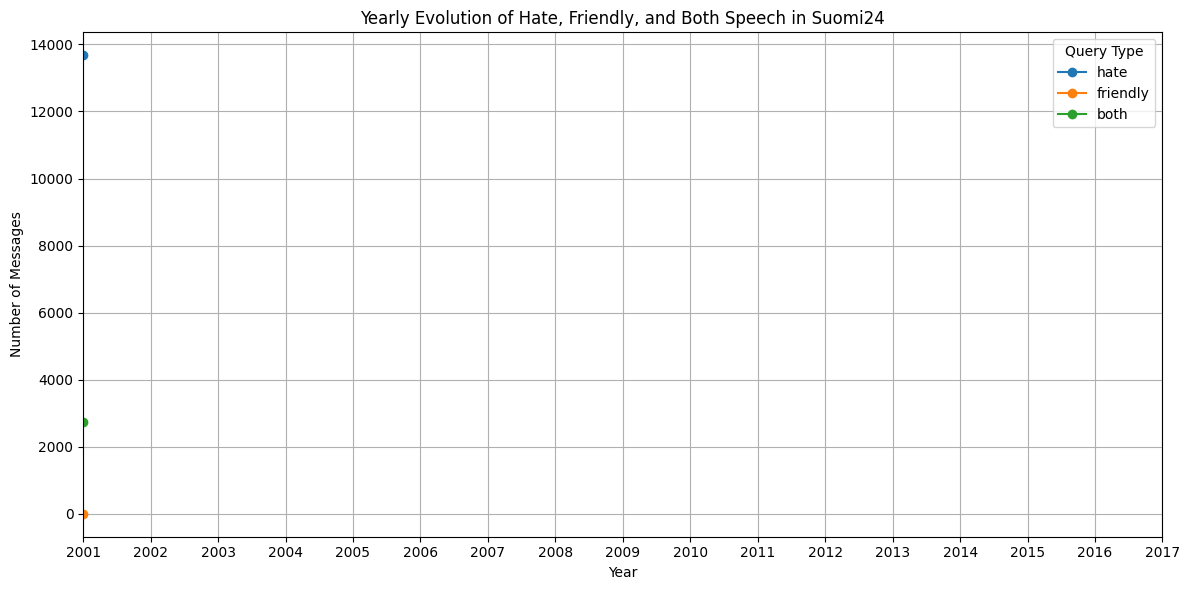

In [ ]:
plt.figure(figsize=(12,6))
agg.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Yearly Evolution of Hate, Friendly, and Both Speech in Suomi24')
plt.xlabel('Year')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.legend(title='Query Type')
plt.xlim(2001, 2017)
plt.xticks(range(2001, 2018))
plt.tight_layout()
plt.show()